In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Model definition
class RidgeRegression(nn.Module):
    def __init__(self, input_dim, output_dim, alpha=1):
        super(RidgeRegression, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        self.alpha = alpha
    
    def forward(self, x):
        return self.linear(x)
    
    def l2_regularization(self):
        l2_norm = torch.norm(self.linear.weight)
        return self.alpha * l2_norm


In [3]:
np.random.seed(1)

#Testing with a straight line
X = 1 * np.random.rand(50, 1)
y = 0.5 + 3 * X + np.random.randn(50, 1)

X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)
input_dim = X.shape[1]
output_dim = y.shape[1]
alpha = 0.1  # Regularization parameter
model = RidgeRegression(input_dim, output_dim, alpha)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [40]:
# Training the model
def train_model(model, optimizer, criterion, X_tensor, y_tensor, num_epochs=10000):
    for epoch in range(num_epochs):
        # Forward pass
        outputs = model(X_tensor)
        loss = criterion(outputs, y_tensor) + model.l2_regularization()
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

train_model(model=model,optimizer=optimizer, criterion=criterion, X_tensor=X_tensor, y_tensor=y_tensor)

Epoch [1/10000], Loss: 20.2433
Epoch [2/10000], Loss: 19.3144
Epoch [3/10000], Loss: 18.4307
Epoch [4/10000], Loss: 17.5901
Epoch [5/10000], Loss: 16.7904
Epoch [6/10000], Loss: 16.0296
Epoch [7/10000], Loss: 15.3059
Epoch [8/10000], Loss: 14.6173
Epoch [9/10000], Loss: 13.9623
Epoch [10/10000], Loss: 13.3392
Epoch [11/10000], Loss: 12.7464
Epoch [12/10000], Loss: 12.1824
Epoch [13/10000], Loss: 11.6459
Epoch [14/10000], Loss: 11.1354
Epoch [15/10000], Loss: 10.6497
Epoch [16/10000], Loss: 10.1877
Epoch [17/10000], Loss: 9.7481
Epoch [18/10000], Loss: 9.3299
Epoch [19/10000], Loss: 8.9319
Epoch [20/10000], Loss: 8.5533
Epoch [21/10000], Loss: 8.1931
Epoch [22/10000], Loss: 7.8504
Epoch [23/10000], Loss: 7.5243
Epoch [24/10000], Loss: 7.2145
Epoch [25/10000], Loss: 6.9303
Epoch [26/10000], Loss: 6.6599
Epoch [27/10000], Loss: 6.4026
Epoch [28/10000], Loss: 6.1579
Epoch [29/10000], Loss: 5.9251
Epoch [30/10000], Loss: 5.7036
Epoch [31/10000], Loss: 5.4929
Epoch [32/10000], Loss: 5.2924
E

In [41]:
w, b = model.parameters()

print("Weight:", w.item())
print("Bias:", b.item())

w = w.detach().numpy()
b = b.detach().numpy()

Weight: 2.735508918762207
Bias: 0.7519937753677368


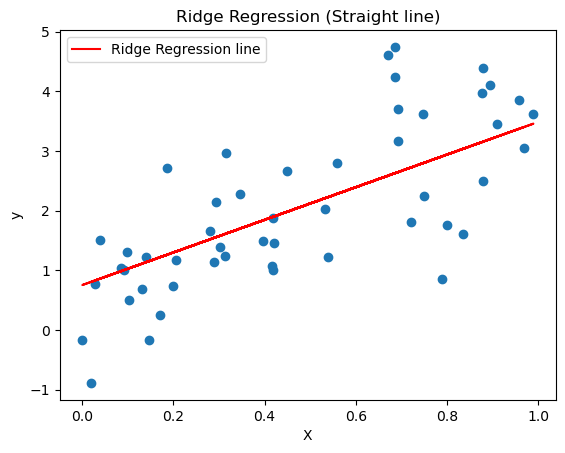

In [42]:
plt.scatter(X, y)
plt.plot(X, w*X + b, color='red', label='Ridge Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Ridge Regression (Straight line)')
plt.legend()
plt.show()

In [47]:
# Testing with Non-linear relationship

np.random.seed(65)
X = 2 * np.random.rand(100, 1)
Y_poly = np.sin(X) + np.random.normal(scale=0.1, size=(100, 1))  


In [48]:
def polynomial_basis(X, degree=4):
    return np.hstack([X**i for i in range(1, degree+1)])
X_poly = polynomial_basis(X)
print (X_poly)

X_tensor = torch.tensor(X_poly, dtype=torch.float32)
y_tensor = torch.tensor(Y_poly, dtype=torch.float32)

input_dim = X_poly.shape[1]
output_dim = Y_poly.shape[1]
alpha = 0.001 
model = RidgeRegression(input_dim, output_dim, alpha)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

[[4.37290100e-01 1.91222632e-01 8.36197638e-02 3.65660949e-02]
 [6.28054390e-02 3.94452317e-03 2.47737509e-04 1.55592630e-05]
 [5.74250555e-01 3.29763700e-01 1.89366987e-01 1.08744098e-01]
 [3.45289311e-01 1.19224708e-01 4.11670174e-02 1.42145311e-02]
 [6.06752762e-01 3.68148914e-01 2.23375370e-01 1.35533623e-01]
 [3.25900445e-01 1.06211100e-01 3.46142448e-02 1.12807978e-02]
 [1.39862751e+00 1.95615890e+00 2.73593765e+00 3.82655765e+00]
 [1.54302166e+00 2.38091585e+00 3.67380474e+00 5.66876030e+00]
 [1.02910490e+00 1.05905689e+00 1.08988063e+00 1.12160149e+00]
 [4.71613776e-01 2.22419554e-01 1.04896126e-01 4.94704580e-02]
 [4.60079253e-01 2.11672919e-01 9.73863186e-02 4.48054247e-02]
 [1.01143033e+00 1.02299132e+00 1.03468445e+00 1.04651124e+00]
 [2.68369926e-01 7.20224172e-02 1.93286508e-02 5.18722857e-03]
 [1.12292453e+00 1.26095949e+00 1.41596234e+00 1.59001884e+00]
 [9.64000406e-01 9.29296783e-01 8.95842476e-01 8.63592511e-01]
 [1.35933751e+00 1.84779847e+00 2.51178177e+00 3.414359

In [49]:
train_model(model=model,optimizer=optimizer, criterion=criterion, X_tensor=X_tensor, y_tensor=y_tensor)

Epoch [1/10000], Loss: 106.8772
Epoch [2/10000], Loss: 18.1028
Epoch [3/10000], Loss: 4.7926
Epoch [4/10000], Loss: 2.7248
Epoch [5/10000], Loss: 2.3349
Epoch [6/10000], Loss: 2.1984
Epoch [7/10000], Loss: 2.1028
Epoch [8/10000], Loss: 2.0165
Epoch [9/10000], Loss: 1.9345
Epoch [10/10000], Loss: 1.8562
Epoch [11/10000], Loss: 1.7811
Epoch [12/10000], Loss: 1.7091
Epoch [13/10000], Loss: 1.6401
Epoch [14/10000], Loss: 1.5741
Epoch [15/10000], Loss: 1.5107
Epoch [16/10000], Loss: 1.4501
Epoch [17/10000], Loss: 1.3919
Epoch [18/10000], Loss: 1.3362
Epoch [19/10000], Loss: 1.2828
Epoch [20/10000], Loss: 1.2316
Epoch [21/10000], Loss: 1.1826
Epoch [22/10000], Loss: 1.1356
Epoch [23/10000], Loss: 1.0906
Epoch [24/10000], Loss: 1.0474
Epoch [25/10000], Loss: 1.0061
Epoch [26/10000], Loss: 0.9664
Epoch [27/10000], Loss: 0.9284
Epoch [28/10000], Loss: 0.8920
Epoch [29/10000], Loss: 0.8571
Epoch [30/10000], Loss: 0.8237
Epoch [31/10000], Loss: 0.7916
Epoch [32/10000], Loss: 0.7609
Epoch [33/1000

In [50]:
w, b = model.parameters()
w = w.detach().numpy()
b = b.detach().numpy()

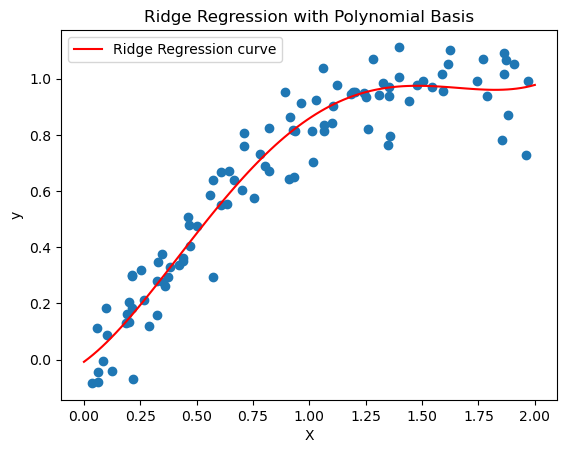

In [51]:
plt.scatter(X, Y_poly)
X_test = np.linspace(0, 2, 100).reshape(-1, 1)
X_test_poly = polynomial_basis(X_test)
y_pred = np.dot(X_test_poly, w.T) + b.item()
plt.plot(X_test, y_pred, color='red', label='Ridge Regression curve')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Ridge Regression with Polynomial Basis')
plt.legend()
plt.show()

Let's compare with scikit-learn model

In [1]:
from sklearn.kernel_ridge import KernelRidge
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(2)
X = 2 * np.random.rand(100, 1)
Y = np.sin(X) + np.random.normal(scale=0.1, size=(100, 1))  
def polynomial_basis(X, degree=3):
    return np.hstack([X**i for i in range(1, degree+1)])
X_poly = polynomial_basis(X)

In [2]:
krr = KernelRidge(alpha=0.001)
krr.fit(X_poly, Y)

KernelRidge(alpha=0.001)

In [3]:
X_test = np.linspace(0, 2, 100).reshape(-1, 1)
X_test_poly = polynomial_basis(X_test)

predictions = krr.predict(X_test_poly)
predictions = predictions.flatten()

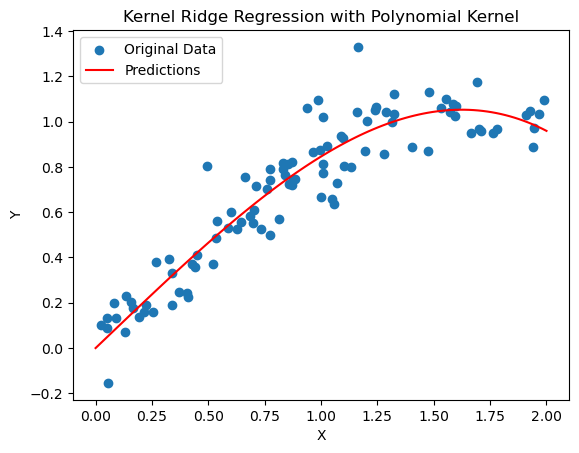

In [4]:
# Plot original data
plt.scatter(X, Y, label='Original Data')

# Plot predicted values
plt.plot(X_test, predictions, color='red', label='Predictions')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Kernel Ridge Regression with Polynomial Kernel')
plt.legend()
plt.show()

In [52]:
# For a sinusoidal signal data

num_samples = 1000

X = np.linspace(0, 4*np.pi, num_samples).reshape(-1, 1)
y = np.sin(X).reshape(-1, 1)

X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

input_dim = X.shape[1]
output_dim = y.shape[1]
alpha = 0.1
model = RidgeRegression(input_dim, output_dim, alpha)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)


train_model(model=model,optimizer=optimizer, criterion=criterion, X_tensor=X_tensor, y_tensor=y_tensor)


Epoch [1/10000], Loss: 4.6206
Epoch [2/10000], Loss: 0.7483
Epoch [3/10000], Loss: 0.7271
Epoch [4/10000], Loss: 0.7239
Epoch [5/10000], Loss: 0.7209
Epoch [6/10000], Loss: 0.7179
Epoch [7/10000], Loss: 0.7149
Epoch [8/10000], Loss: 0.7120
Epoch [9/10000], Loss: 0.7091
Epoch [10/10000], Loss: 0.7062
Epoch [11/10000], Loss: 0.7033
Epoch [12/10000], Loss: 0.7005
Epoch [13/10000], Loss: 0.6977
Epoch [14/10000], Loss: 0.6949
Epoch [15/10000], Loss: 0.6922
Epoch [16/10000], Loss: 0.6895
Epoch [17/10000], Loss: 0.6868
Epoch [18/10000], Loss: 0.6841
Epoch [19/10000], Loss: 0.6815
Epoch [20/10000], Loss: 0.6788
Epoch [21/10000], Loss: 0.6763
Epoch [22/10000], Loss: 0.6737
Epoch [23/10000], Loss: 0.6712
Epoch [24/10000], Loss: 0.6686
Epoch [25/10000], Loss: 0.6662
Epoch [26/10000], Loss: 0.6637
Epoch [27/10000], Loss: 0.6612
Epoch [28/10000], Loss: 0.6588
Epoch [29/10000], Loss: 0.6564
Epoch [30/10000], Loss: 0.6541
Epoch [31/10000], Loss: 0.6517
Epoch [32/10000], Loss: 0.6494
Epoch [33/10000],

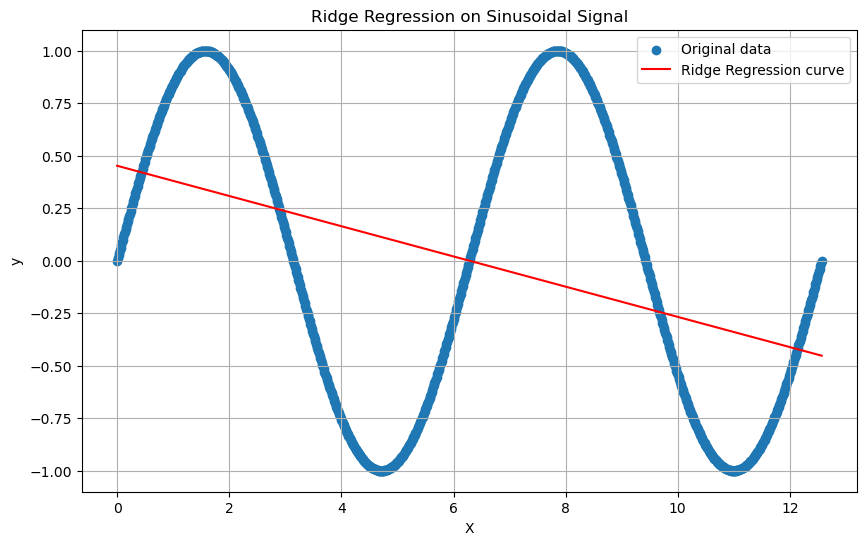

In [56]:
w, b = model.linear.weights.item(), model.linear.bias.item()

X_test = np.linspace(0, 4*np.pi, 600).reshape(-1, 1)
y_pred = np.dot(np.hstack([X_test, np.ones_like(X_test)]), np.array([w, b]))

# Plot original data and regression curve
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Original data')
plt.plot(X_test, y_pred, color='red', label='Ridge Regression curve')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Ridge Regression on Sinusoidal Signal')
plt.legend()
plt.grid(True)
plt.show()


A ridge regressor underfits data since with a sinusoidal wave because it is not expressive enough. But why a ridge regression is capable to fit into a polynomial basis and not to a sinusoidal ones? This is because polynomial basis functions are linear with respect to the parameters. In other words, if you have a polynomial basis like (x, x^2, x^3, ...), you can treat each power of x as a separate feature, and then ridge regression can be applied to estimate the coefficients for each of these features. In the other hand, sinusoidal functions are not linear with respect to their parameters.


How does a MLP perform?

Epoch [1/100000], Loss: 7.7191
Epoch [2/100000], Loss: 6.9267
Epoch [3/100000], Loss: 6.1957
Epoch [4/100000], Loss: 5.5261
Epoch [5/100000], Loss: 4.9182
Epoch [6/100000], Loss: 4.3715
Epoch [7/100000], Loss: 3.8861
Epoch [8/100000], Loss: 3.4606
Epoch [9/100000], Loss: 3.0934
Epoch [10/100000], Loss: 2.7825
Epoch [11/100000], Loss: 2.5252
Epoch [12/100000], Loss: 2.3181
Epoch [13/100000], Loss: 2.1583
Epoch [14/100000], Loss: 2.0412
Epoch [15/100000], Loss: 1.9620
Epoch [16/100000], Loss: 1.9151
Epoch [17/100000], Loss: 1.8949
Epoch [18/100000], Loss: 1.8953
Epoch [19/100000], Loss: 1.9107
Epoch [20/100000], Loss: 1.9354
Epoch [21/100000], Loss: 1.9645
Epoch [22/100000], Loss: 1.9938
Epoch [23/100000], Loss: 2.0198
Epoch [24/100000], Loss: 2.0399
Epoch [25/100000], Loss: 2.0527
Epoch [26/100000], Loss: 2.0572
Epoch [27/100000], Loss: 2.0534
Epoch [28/100000], Loss: 2.0420
Epoch [29/100000], Loss: 2.0239
Epoch [30/100000], Loss: 2.0005
Epoch [31/100000], Loss: 1.9731
Epoch [32/100000]

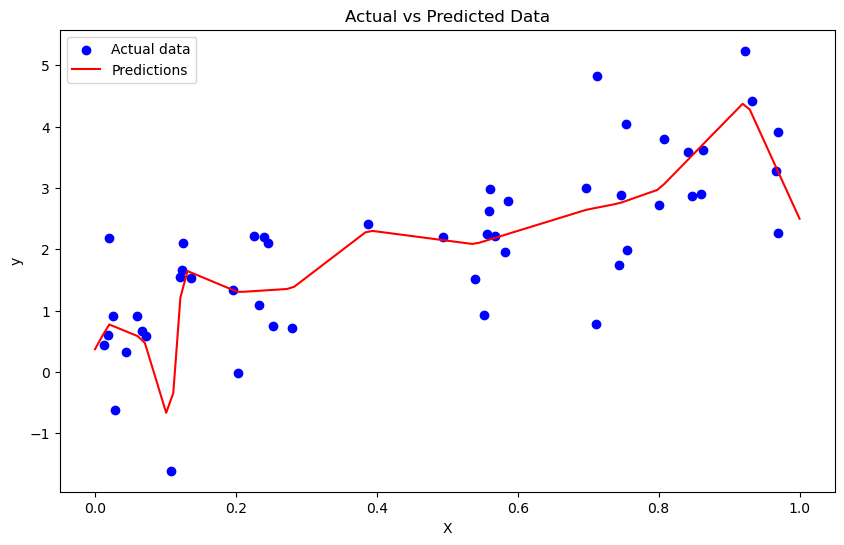

In [62]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Model definition
class LinearLayer(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearLayer, self).__init__()
        self.input_size = input_size
        self.output_size = output_size
        self.weights = nn.Parameter(torch.randn(output_size, input_size))  # Random initialization of weights
        self.bias = nn.Parameter(torch.randn(output_size))  # Random initialization of bias

    def forward(self, x):
        # Forward pass of the linear layer. x: Input data, shape (batch_size, input_size)
        self.input = x
        self.output = torch.matmul(x, self.weights.t()) + self.bias
        return self.output

class MLP(nn.Module):
    def __init__(self, input_dim=1, hidden_dims=[64, 32], output_dim=1):
        super(MLP, self).__init__()
        layers = []
        prev_dim = input_dim
        for hidden_dim in hidden_dims:
            layers.append(LinearLayer(prev_dim, hidden_dim))
            layers.append(nn.ReLU())
            prev_dim = hidden_dim
        layers.append(LinearLayer(prev_dim, output_dim))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

class RidgeRegression(nn.Module):
    def __init__(self, input_dim, hidden_dims, output_dim, alpha=0.01):
        super(RidgeRegression, self).__init__()
        self.mlp = MLP(input_dim, hidden_dims, output_dim)
        self.alpha = alpha
        self.loss_function = nn.MSELoss()

    def forward(self, x):
        return self.mlp(x)

    def l2_regularization(self):
        l2_norm = 0
        for param in self.mlp.parameters():
            l2_norm += torch.norm(param)
        return self.alpha * l2_norm



X = 1 * np.random.rand(50, 1)
y = 0.5 + 3 * X + np.random.randn(50, 1)
inputs = torch.tensor(X, dtype=torch.float32)
targets = torch.tensor(y, dtype=torch.float32)

input_dim = X.shape[1]
output_dim = y.shape[1]

model = RidgeRegression(input_dim, hidden_dims=[64, 32], output_dim=output_dim)

optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 100000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(inputs)
    loss = model.loss_function(outputs, targets) + model.l2_regularization()

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

X_test = np.linspace(0, 1, 100).reshape(-1, 1)
inputs_test = torch.tensor(X_test, dtype=torch.float32)
with torch.no_grad():
    predictions = model(inputs_test).numpy()

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X_test, predictions, color='red', label='Predictions')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Actual vs Predicted Data')
plt.legend()
plt.show()

 How to have a more expressive model? We have to define a so-called kernel. A kernel is an embedding from the original feature space to another one. Simply put, it is used to map our original data into a newer and more complex feature space. This new space is explicitly defined by the choice of kernel.
